In [1]:
import math; import time; import os; import matplotlib.pyplot as plt; 


In [2]:
# Generate the GCODE to print an array of droplets in a circular well. 

def gcode_for_circular_droplet_array(diameter, name, droplet_number):

    # Define the diameter of the circle the droplets will fit inside
    D = diameter; R = 0.5*D; # For a 6-well plate with buffer for nozzle to fit 
    
    # Print parameters
    Zhighpoint = -0.5; Zlowpoint = 0; Etime = 0.1; 
    
    # Calculate the spacing between droplets 
    Area = math.pi*R**2; # Calculate total area
    Area_specific = Area/droplet_number; # Calculat area per droplet
    droplet_spacing = math.sqrt(Area_specific); # Spacing between droplets 
    
    # Name and open the file. Write the gcode header. 
    timestr = time.strftime("%Y%m%d-%H%M%S");
    filename = os.path.join("GCode_Circle" , name + "_D" + str(diameter) + "_N" + str(droplet_number) + "_S" + str("%.2f" % droplet_spacing) + '.gcode')
    text_file = open(filename, "a+");
    text_file = open(filename, "r+");
    text_file.write("\n; Date Compiled: %s" % timestr );
    text_file.write("\n; GCODE Reference: http://reprap.org/wiki/G-code#G0_.26_G1:_Move");
    text_file.write("\nG21; set units to millimeters");
    text_file.write("\nG90; use G90 for absolute and G91 for incremental/relative coordinates");
    text_file.write("\nG83; use G82 for absolute and G83 for incremental/relative distance for extrusion");
    
    droplet_count = 0; # Count droplets
    
    # Calculate the droplets placed along the diameter
    droplets_along_diameter = int(D/droplet_spacing + 1);  
    
    for y in range(droplets_along_diameter):
        
        y_coordinate = y*droplet_spacing; # Calculate y coordinate
        
        # Calculate the droplets per row  
        half_row_length = math.sqrt(R**2 - (R-y_coordinate)**2); # Calculate row length 
        row_length = 2*half_row_length; 
        droplets_per_row = int(row_length/droplet_spacing + 1);  
        
        x_coordinate = abs(R + half_row_length); # Calculate x coordinate 
        
        for x in range(droplets_per_row): 
            
            text_file.write("\n")
            text_file.write("\n G1 X%.2f" % x_coordinate)
            text_file.write(" Y%.2f" % y_coordinate)     
            text_file.write(" Z%.2f" % Zhighpoint)
            text_file.write(" E0")

            text_file.write("\n G1 X%.2f" % x_coordinate)
            text_file.write(" Y%.2f" % y_coordinate)  
            text_file.write(" Z%.2f" % Zlowpoint)
            text_file.write(" E%.2f" % Etime) 

            text_file.write("\n G1 X%.2f" % x_coordinate)
            text_file.write(" Y%.2f" % y_coordinate)     
            text_file.write(" Z%.2f" % Zhighpoint)
            text_file.write(" E0")
            
            droplet_count = droplet_count + 1; 
            x_coordinate = x_coordinate - droplet_spacing;
            
        y_coordinate = y_coordinate + droplet_spacing;
       
    text_file.write("\n G1 Z%.2f" % -2)
    text_file.close()
     
    return(droplet_spacing, droplet_count)

Number of Droplets: 50
XY Spacing (mm): 4.26  Droplets Count:  51
Number of Droplets: 100
XY Spacing (mm): 3.01  Droplets Count:  106
Number of Droplets: 200
XY Spacing (mm): 2.13  Droplets Count:  203
Number of Droplets: 400
XY Spacing (mm): 1.51  Droplets Count:  411
Number of Droplets: 800
XY Spacing (mm): 1.07  Droplets Count:  811
Number of Droplets: 1600
XY Spacing (mm): 0.75  Droplets Count:  1621
Number of Droplets: 3200
XY Spacing (mm): 0.53  Droplets Count:  3229


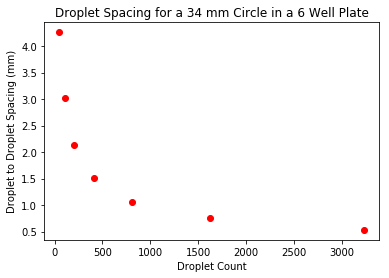

Number of Droplets: 50
XY Spacing (mm): 4.01  Droplets Count:  51
Number of Droplets: 100
XY Spacing (mm): 2.84  Droplets Count:  106
Number of Droplets: 200
XY Spacing (mm): 2.01  Droplets Count:  203
Number of Droplets: 400
XY Spacing (mm): 1.42  Droplets Count:  411
Number of Droplets: 800
XY Spacing (mm): 1.00  Droplets Count:  811
Number of Droplets: 1600
XY Spacing (mm): 0.71  Droplets Count:  1621


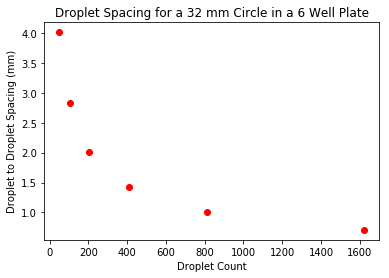

Number of Droplets: 50
XY Spacing (mm): 3.76  Droplets Count:  51
Number of Droplets: 100
XY Spacing (mm): 2.66  Droplets Count:  106
Number of Droplets: 200
XY Spacing (mm): 1.88  Droplets Count:  203
Number of Droplets: 400
XY Spacing (mm): 1.33  Droplets Count:  411
Number of Droplets: 800
XY Spacing (mm): 0.94  Droplets Count:  811
Number of Droplets: 1600
XY Spacing (mm): 0.66  Droplets Count:  1621


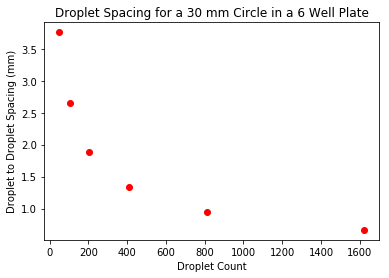

Number of Droplets: 50
XY Spacing (mm): 3.51  Droplets Count:  51
Number of Droplets: 100
XY Spacing (mm): 2.48  Droplets Count:  106
Number of Droplets: 200
XY Spacing (mm): 1.75  Droplets Count:  203
Number of Droplets: 400
XY Spacing (mm): 1.24  Droplets Count:  411
Number of Droplets: 800
XY Spacing (mm): 0.88  Droplets Count:  811
Number of Droplets: 1600
XY Spacing (mm): 0.62  Droplets Count:  1621


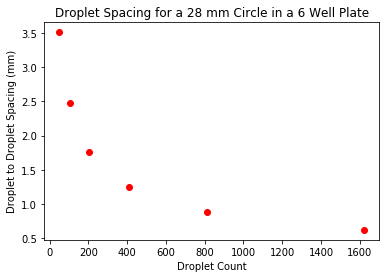

In [3]:
diameter  = 34;  # Diameter of well in a 6 well plate - maximum pattern diameter 

while diameter > 26: 
    
    droplet_number = 50;
    droplet_spacing = droplet_number;
    list_droplet_count = []; list_droplet_spacing = []; 
    
    while droplet_spacing > 0.75: 
        print("Number of Droplets:", droplet_number)
        droplet_spacing, droplet_count = gcode_for_circular_droplet_array(diameter, "Circle_", droplet_number)
        list_droplet_count.append(droplet_count); list_droplet_spacing.append(droplet_spacing);
        print("XY Spacing (mm):", "%.2f" % droplet_spacing, " Droplets Count: ", droplet_count)
        droplet_number = droplet_number*2;
    
    plt.plot(list_droplet_count, list_droplet_spacing, 'ro') 
    plt.xlabel("Droplet Count")
    plt.ylabel("Droplet to Droplet Spacing (mm)")
    plt.title("Droplet Spacing for a " + str(diameter) + " mm Circle in a 6 Well Plate")
    plt.show()
    
    diameter = diameter - 2
